In [25]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

### Conection to spotify

In [27]:
secrets_file = open("secrets.txt","r")
string = secrets_file.read()
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()
        
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                           client_secret=secrets_dict['clientsecret']))

In [2]:
big_df=pd.read_csv("combined_spotify_data.csv")

In [3]:
big_df.rename(columns={'id_x': 'track_id', 'id_y': 'artist_id'}, inplace=True)

In [4]:
big_df


,track_id,track_name,popularity_x,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,artist_id,followers,genres,artist_name,popularity_y
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.4450,...,0.744000,0.1510,0.1270,104.851,3,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.695,0.2630,...,0.000000,0.1480,0.6550,102.009,1,14jtPCOoNZwquk5wd9DxrY,3.0,[],Fernando Pessoa,0.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.434,0.1770,...,0.021800,0.2120,0.4570,130.418,5,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.321,0.0946,...,0.918000,0.1040,0.3970,169.980,3,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],3BiJGZsyX9sJchTqcSA7Su,1922,0.402,0.1580,...,0.130000,0.3110,0.1960,103.220,4,3BiJGZsyX9sJchTqcSA7Su,11327.0,"['adult standards', 'big band', 'easy listenin...",Dick Haymes,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757165,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],1dy5WNgIKQU6ezkpZs4y8z,2020-10-21,0.765,0.6630,...,0.000297,0.0924,0.6860,150.091,4,1dy5WNgIKQU6ezkpZs4y8z,245944.0,"['alt z', 'alternative r&b', 'bedroom pop', 'i...",ROLE MODEL,67.0
757166,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],37M5pPGs6V1fchFJSgCguX,2020-09-02,0.535,0.3140,...,0.000150,0.0874,0.0663,145.095,4,37M5pPGs6V1fchFJSgCguX,1168213.0,"['alt z', 'electropop', 'indie pop', 'la indie...",FINNEAS,77.0
757167,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']",4jGPdu95icCKVF31CcFKbS,2021-03-05,0.696,0.6150,...,0.000003,0.3050,0.4380,90.029,4,4jGPdu95icCKVF31CcFKbS,45309.0,"['chill r&b', 'indie cafe pop', 'singaporean p...",Gentle Bones,58.0
757168,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']",5ebPSE9YI5aLeZ1Z2gkqjn,2021-03-05,0.696,0.6150,...,0.000003,0.3050,0.4380,90.029,4,5ebPSE9YI5aLeZ1Z2gkqjn,93797.0,"['opm', 'pinoy indie', 'pinoy singer-songwriter']",Clara Benin,53.0


In [5]:
hot_songs_df=pd.read_csv("hot_songs.csv")

In [6]:
hot_songs_df["Song Title"] = hot_songs_df["Song Title"].str.lower()
hot_songs_df["Artist"] = hot_songs_df["Artist"].str.lower()

In [7]:
hot_songs_df=hot_songs_df.drop("Unnamed: 0",axis=1)

In [8]:
hot_songs_df.columns=["title","artist"]

In [9]:
hot_songs_df

,title,artist
0,cruel summer,taylor swift
1,lovin on me,jack harlow
2,paint the town red,doja cat
3,snooze,sza
4,is it over now? (taylor's version) [from the v...,taylor swift
...,...,...
171,bigger than the whole sky,taylor swift
172,good good,"usher, summer walker & 21 savage"
173,vampire,olivia rodrigo
174,strong,anne wilson


# Unsupervised Learning: K-means clustering

In [10]:
big_df=big_df.dropna()

In [11]:
#taking onyl 10% of the data so is not so slow

sampled_df = big_df.sample(frac=0.05)
sampled_df

,track_id,track_name,popularity_x,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,artist_id,followers,genres,artist_name,popularity_y
44488,4ZSV6q9ipCNHSuadp3YIjg,Mi Todo,8,185861,0,['Los Hermanos Arriagada'],46E2EFuD1UFO1H7az7hoB6,1954-01-19,0.330,0.2580,...,0.000398,0.4890,0.643,184.109,3,46E2EFuD1UFO1H7az7hoB6,4134.0,"['classic colombian pop', 'pop romantico']",Los Hermanos Arriagada,29.0
637056,3kMvz89G9sqvg2MpA90IEm,Brüder (Stell dir vor),22,228640,0,['Pur'],175a900UJkfGsIGcvUDaEx,1990,0.303,0.7770,...,0.000000,0.0737,0.510,79.364,4,175a900UJkfGsIGcvUDaEx,267346.0,"['german pop', 'german rock', 'partyschlager',...",Pur,59.0
329783,0ydbjBVo6rFNAqvTAy1oWP,La Distancia,38,204973,0,['Luciano Pereyra'],6ZZ2DeepA3GpoGU4KwqSlU,2002-01-01,0.627,0.4880,...,0.000000,0.1640,0.456,160.023,4,6ZZ2DeepA3GpoGU4KwqSlU,1357830.0,"['argentine telepop', 'folklore argentino', 'l...",Luciano Pereyra,67.0
291759,3gjWuzUVCs2zGVF2g2mCV3,נומי נים,10,94253,0,['Osnat Paz'],0gE0oNSkOYxmocw3btSRcw,1972-01-01,0.437,0.3060,...,0.000000,0.0473,0.309,122.002,4,0gE0oNSkOYxmocw3btSRcw,203.0,[],Osnat Paz,29.0
77393,2JEgJc3qlzTr96IBqfeulB,This Is All I Have For You - 2018 Remaster,41,307797,0,['Makoto Matsushita'],5qm3bAgsYq5aBOymqkM4gG,1982-04-21,0.734,0.6620,...,0.008280,0.3370,0.832,119.867,4,5qm3bAgsYq5aBOymqkM4gG,9500.0,['classic city pop'],Makoto Matsushita,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111507,1U1qumuS2O5Qttw8G7UXOZ,Teman Hidup,61,222893,0,['Tulus'],2iDVt6mFbtbDEZG5ax0dTi,2011-03-08,0.719,0.2590,...,0.000008,0.0871,0.419,83.032,4,2iDVt6mFbtbDEZG5ax0dTi,3232907.0,"['indonesian jazz', 'indonesian pop']",Tulus,69.0
387131,0ekyBYnVBAvzdLXtVYLSc5,The Maple Leaf Forever,10,165440,0,['Alan Mills'],0jO5e5ieXOPwlp7d4rk2S1,1960-01-01,0.789,0.0282,...,0.000000,0.1880,0.524,113.398,4,0jO5e5ieXOPwlp7d4rk2S1,650.0,[],Alan Mills,17.0
613389,3nbbsozjIWDey9G3Qj7RPd,Yo Planto (feat. Alborosie),48,349133,0,"['Quique Neira', 'Alborosie']",78u1jLVBjPSXQVmHBV43yG,2011-11-25,0.929,0.5540,...,0.000004,0.0703,0.708,133.781,4,78u1jLVBjPSXQVmHBV43yG,541726.0,"['modern reggae', 'reggae', 'roots reggae']",Alborosie,62.0
705268,2S4r2ljYYHNrHSwMw6rvNW,Santa Rosa,22,182280,0,['ABBA'],0LcJLqbBmaGUft1e9Mm8HV,1973,0.508,0.7080,...,0.000002,0.0846,0.658,137.912,4,0LcJLqbBmaGUft1e9Mm8HV,5558002.0,"['europop', 'swedish pop']",ABBA,81.0


In [12]:
columns_to_drop = ['track_id', 'track_name', 'explicit', 'artists', 
                   'id_artists', 'release_date', 'artist_id', 
                   'genres', 'artist_name', 'popularity_x', 'popularity_y']

In [13]:
sampled_df = sampled_df.drop(columns=columns_to_drop)

In [14]:
sampled_df

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers
44488,185861,0.330,0.2580,10,-13.415,0,0.0432,0.95800,0.000398,0.4890,0.643,184.109,3,4134.0
637056,228640,0.303,0.7770,9,-5.594,1,0.0445,0.10200,0.000000,0.0737,0.510,79.364,4,267346.0
329783,204973,0.627,0.4880,2,-7.219,1,0.0381,0.56900,0.000000,0.1640,0.456,160.023,4,1357830.0
291759,94253,0.437,0.3060,2,-10.567,0,0.0381,0.83000,0.000000,0.0473,0.309,122.002,4,203.0
77393,307797,0.734,0.6620,11,-9.094,0,0.0375,0.23500,0.008280,0.3370,0.832,119.867,4,9500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111507,222893,0.719,0.2590,2,-12.970,1,0.0316,0.86900,0.000008,0.0871,0.419,83.032,4,3232907.0
387131,165440,0.789,0.0282,8,-23.151,0,0.0616,0.97600,0.000000,0.1880,0.524,113.398,4,650.0
613389,349133,0.929,0.5540,7,-5.950,1,0.0618,0.00306,0.000004,0.0703,0.708,133.781,4,541726.0
705268,182280,0.508,0.7080,4,-10.759,1,0.0303,0.04390,0.000002,0.0846,0.658,137.912,4,5558002.0


### scale the data 

In [15]:
transformer = StandardScaler().fit(sampled_df)
cluster_df_normalized = transformer.transform(sampled_df)

# Now, all features will have the same weight.
cluster_df_normalized = pd.DataFrame(cluster_df_normalized,columns=sampled_df.columns)
cluster_df_normalized

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers
0,-0.339384,-1.286859,-1.012474,1.364934,-0.492782,-1.387925,-0.367195,1.322768,-0.447109,1.457875,0.409855,2.246750,-1.75968,-0.271250
1,-0.051837,-1.441623,0.983633,1.080587,0.919615,0.720500,-0.360277,-1.065248,-0.448537,-0.767912,-0.096780,-1.266130,0.28194,-0.198630
2,-0.210919,0.415543,-0.127879,-0.909847,0.626156,0.720500,-0.394332,0.237560,-0.448537,-0.283952,-0.302482,1.438967,0.28194,0.102233
3,-0.955144,-0.673536,-0.827863,-0.909847,0.021540,-1.387925,-0.394332,0.965682,-0.448537,-0.909401,-0.862447,0.163840,0.28194,-0.272334
4,0.480231,1.028867,0.541336,1.649282,0.287549,-1.387925,-0.397525,-0.694213,-0.418814,0.643236,1.129811,0.092237,0.28194,-0.269769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36542,-0.090467,0.942887,-1.008628,-0.909847,-0.412419,0.720500,-0.428919,1.074481,-0.448508,-0.696095,-0.443425,-1.143115,0.28194,0.619564
36543,-0.476648,1.344127,-1.896300,0.796239,-2.251009,-1.387925,-0.269288,1.372983,-0.448537,-0.155324,-0.043450,-0.124717,0.28194,-0.272211
36544,0.758079,2.146606,0.125961,0.511891,0.855325,0.720500,-0.268223,-1.341265,-0.448522,-0.786134,0.657459,0.558877,0.28194,-0.122929
36545,-0.363454,-0.266564,0.718255,-0.341152,-0.013134,0.720500,-0.435836,-1.227332,-0.448532,-0.709493,0.466995,0.697421,0.28194,1.261055


In [16]:
cluster_df_normalized

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers
0,-0.339384,-1.286859,-1.012474,1.364934,-0.492782,-1.387925,-0.367195,1.322768,-0.447109,1.457875,0.409855,2.246750,-1.75968,-0.271250
1,-0.051837,-1.441623,0.983633,1.080587,0.919615,0.720500,-0.360277,-1.065248,-0.448537,-0.767912,-0.096780,-1.266130,0.28194,-0.198630
2,-0.210919,0.415543,-0.127879,-0.909847,0.626156,0.720500,-0.394332,0.237560,-0.448537,-0.283952,-0.302482,1.438967,0.28194,0.102233
3,-0.955144,-0.673536,-0.827863,-0.909847,0.021540,-1.387925,-0.394332,0.965682,-0.448537,-0.909401,-0.862447,0.163840,0.28194,-0.272334
4,0.480231,1.028867,0.541336,1.649282,0.287549,-1.387925,-0.397525,-0.694213,-0.418814,0.643236,1.129811,0.092237,0.28194,-0.269769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36542,-0.090467,0.942887,-1.008628,-0.909847,-0.412419,0.720500,-0.428919,1.074481,-0.448508,-0.696095,-0.443425,-1.143115,0.28194,0.619564
36543,-0.476648,1.344127,-1.896300,0.796239,-2.251009,-1.387925,-0.269288,1.372983,-0.448537,-0.155324,-0.043450,-0.124717,0.28194,-0.272211
36544,0.758079,2.146606,0.125961,0.511891,0.855325,0.720500,-0.268223,-1.341265,-0.448522,-0.786134,0.657459,0.558877,0.28194,-0.122929
36545,-0.363454,-0.266564,0.718255,-0.341152,-0.013134,0.720500,-0.435836,-1.227332,-0.448532,-0.709493,0.466995,0.697421,0.28194,1.261055


### Chosing K

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

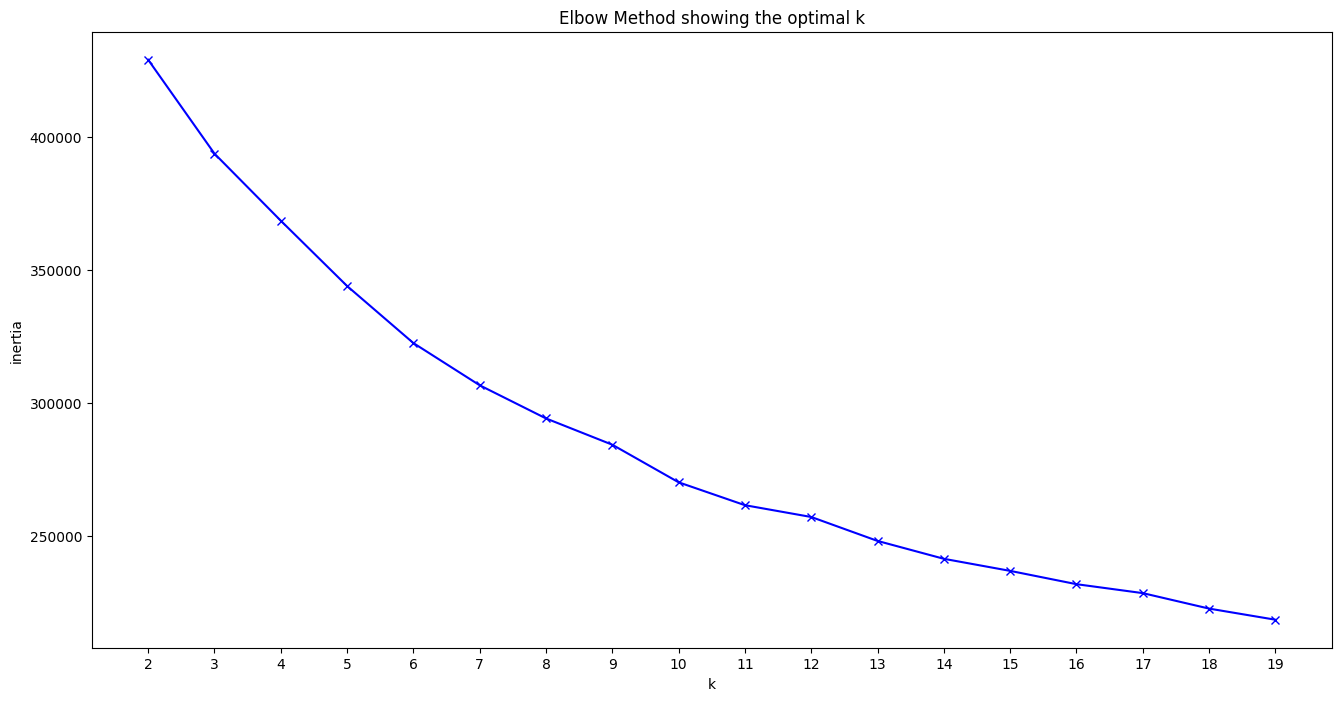

In [17]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    n_init=10,
                    random_state=1234)
    kmeans.fit(cluster_df_normalized)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [18]:
K = range(2, 20)
silhouette = []

In [19]:
# for k in K:
#     kmeans = KMeans(n_clusters=k,
#                     n_init=10,
#                     random_state=1234)
#     kmeans.fit(cluster_df_normalized)
#     silhouette.append(silhouette_score(cluster_df_normalized, kmeans.predict(cluster_df_normalized)))


# plt.figure(figsize=(16,8))
# plt.plot(K, silhouette, 'bx-')
# plt.xlabel('k')
# plt.ylabel('silhouette score')
# plt.xticks(np.arange(min(K), max(K)+1, 1.0))
# plt.title('Slhouette score showing the optimal k')

In [20]:
# i would chose 9
kmeans = KMeans(n_clusters=9, n_init=10, random_state=1234)
kmeans.fit(cluster_df_normalized)

KMeans(n_clusters=9, n_init=10, random_state=1234)

In [21]:
# Predicting and assigning the clusters:
clusters = kmeans.predict(cluster_df_normalized)

In [22]:
# Check the size of the clusters (3rd cluster is a bit too much)
pd.Series(clusters).value_counts().sort_index()

0    2372
1    8802
2    2084
3    5438
4    7217
5     461
6    1687
7    5298
8    3188
dtype: int64

In [23]:
kmeans.inertia_ 

284288.1034354386

In [24]:
clustered_df=sampled_df.assign(clusters = clusters)
clustered_df

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,clusters
44488,185861,0.330,0.2580,10,-13.415,0,0.0432,0.95800,0.000398,0.4890,0.643,184.109,3,4134.0,0
637056,228640,0.303,0.7770,9,-5.594,1,0.0445,0.10200,0.000000,0.0737,0.510,79.364,4,267346.0,1
329783,204973,0.627,0.4880,2,-7.219,1,0.0381,0.56900,0.000000,0.1640,0.456,160.023,4,1357830.0,1
291759,94253,0.437,0.3060,2,-10.567,0,0.0381,0.83000,0.000000,0.0473,0.309,122.002,4,203.0,3
77393,307797,0.734,0.6620,11,-9.094,0,0.0375,0.23500,0.008280,0.3370,0.832,119.867,4,9500.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111507,222893,0.719,0.2590,2,-12.970,1,0.0316,0.86900,0.000008,0.0871,0.419,83.032,4,3232907.0,3
387131,165440,0.789,0.0282,8,-23.151,0,0.0616,0.97600,0.000000,0.1880,0.524,113.398,4,650.0,3
613389,349133,0.929,0.5540,7,-5.950,1,0.0618,0.00306,0.000004,0.0703,0.708,133.781,4,541726.0,1
705268,182280,0.508,0.7080,4,-10.759,1,0.0303,0.04390,0.000002,0.0846,0.658,137.912,4,5558002.0,1


# Song recomender

In [29]:
track = input("Enter a song that you like: ")


if hot_songs_df['title'].str.lower().str.contains(str(track).lower()).any() == True:
        print('here what I found for you! ')
        print(hot_songs_df['title'].sample())
else:
    # get the track name
    results = sp.search(q="track:" + track, type="track")
    
    # find the song uri with spotipy
    song_uri = results['tracks']['items'][0]['uri'].split(':')[2]
    
    #find song features
    song_features = sp.audio_features(song_uri)
    
    #clean song features
    new = pd.DataFrame.from_dict(song_features)
    y_pred = new.drop(columns=['type', 'id' , 'uri', 'track_href', 'analysis_url'])
    
    # scale the data
    y_scaled = transformer.transform(y_pred)
    y_scaled = pd.DataFrame(y_scaled,columns=y_pred.columns)
    
    # use the Kmeans created before to predict the cluster for the song
    look_for = kmeans.predict(y_scaled)
    print('Here what I found for you !!!')
    
    # choose a random row from the platlist with same cluster
    print(playlist_clustered.loc[playlist_clustered.clusters == look_for[0],['title','artist','url']].sample(1))

Enter a song that you like: Nightmare


Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=3GVkPk8mqxz0itaAriG1L7:
 Max Retries, reason: too many 429 error responses